<a href="https://colab.research.google.com/github/reesha-rsh/MLb4/blob/main/Homework/Homework_2_0_Pandas_Toxic_Comments_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#basics
import pandas as pd
import numpy as np

In [2]:
import datetime

In [3]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.style.use('fivethirtyeight')

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
train = pd.read_csv("/content/drive/MyDrive/MLb4/Homework/2.0 Pandas - Toxic Comments EDA/train_1.csv")

In [6]:
train.head()

,Page,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,...,2016-12-22,2016-12-23,2016-12-24,2016-12-25,2016-12-26,2016-12-27,2016-12-28,2016-12-29,2016-12-30,2016-12-31
0,2NE1_zh.wikipedia.org_all-access_spider,18.0,11.0,5.0,13.0,14.0,9.0,9.0,22.0,26.0,...,32.0,63.0,15.0,26.0,14.0,20.0,22.0,19.0,18.0,20.0
1,2PM_zh.wikipedia.org_all-access_spider,11.0,14.0,15.0,18.0,11.0,13.0,22.0,11.0,10.0,...,17.0,42.0,28.0,15.0,9.0,30.0,52.0,45.0,26.0,20.0
2,3C_zh.wikipedia.org_all-access_spider,1.0,0.0,1.0,1.0,0.0,4.0,0.0,3.0,4.0,...,3.0,1.0,1.0,7.0,4.0,4.0,6.0,3.0,4.0,17.0
3,4minute_zh.wikipedia.org_all-access_spider,35.0,13.0,10.0,94.0,4.0,26.0,14.0,9.0,11.0,...,32.0,10.0,26.0,27.0,16.0,11.0,17.0,19.0,10.0,11.0
4,52_Hz_I_Love_You_zh.wikipedia.org_all-access_s...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,48.0,9.0,25.0,13.0,3.0,11.0,27.0,13.0,36.0,10.0


In [7]:
import re
import string

In [8]:
# Use regex to get language from page name
train["Language"] = train["Page"].apply(lambda x: (re.search("_(\w{2})\.wikipedia\.org",str(x)))).apply(lambda x: str(x.group(1)) if x else None )

In [9]:
train.head()

,Page,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,...,2016-12-23,2016-12-24,2016-12-25,2016-12-26,2016-12-27,2016-12-28,2016-12-29,2016-12-30,2016-12-31,Language
0,2NE1_zh.wikipedia.org_all-access_spider,18.0,11.0,5.0,13.0,14.0,9.0,9.0,22.0,26.0,...,63.0,15.0,26.0,14.0,20.0,22.0,19.0,18.0,20.0,zh
1,2PM_zh.wikipedia.org_all-access_spider,11.0,14.0,15.0,18.0,11.0,13.0,22.0,11.0,10.0,...,42.0,28.0,15.0,9.0,30.0,52.0,45.0,26.0,20.0,zh
2,3C_zh.wikipedia.org_all-access_spider,1.0,0.0,1.0,1.0,0.0,4.0,0.0,3.0,4.0,...,1.0,1.0,7.0,4.0,4.0,6.0,3.0,4.0,17.0,zh
3,4minute_zh.wikipedia.org_all-access_spider,35.0,13.0,10.0,94.0,4.0,26.0,14.0,9.0,11.0,...,10.0,26.0,27.0,16.0,11.0,17.0,19.0,10.0,11.0,zh
4,52_Hz_I_Love_You_zh.wikipedia.org_all-access_s...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,9.0,25.0,13.0,3.0,11.0,27.0,13.0,36.0,10.0,zh


1. Вікіпедії яких країн доступні в цьому датасеті?

In [10]:
list(filter(lambda item: item is not None, train["Language"].unique()))

['zh', 'fr', 'en', 'ru', 'de', 'ja', 'es']

Відповідь до завдання 1: **['zh', 'fr', 'en', 'ru', 'de', 'ja', 'es']**

Думаю в завданні малось на увазі, на яких **мовах** доступні вікіпедії


2. Скільки сторінок з французької Вікіпедії у датасеті?

In [11]:
len(train[(train["Language"] == "fr")])

17802

Відповідь до завдання 2: **17802**

3. Вивести топ-3 статі для кожної країни за квітень 2016 року.


In [12]:
#Filter dates
train_april_2016 = train.loc[:, (train.columns >= '2016-04-01') & (train.columns <= '2016-04-30')]
train_april_2016

,2016-04-01,2016-04-02,2016-04-03,2016-04-04,2016-04-05,2016-04-06,2016-04-07,2016-04-08,2016-04-09,2016-04-10,...,2016-04-21,2016-04-22,2016-04-23,2016-04-24,2016-04-25,2016-04-26,2016-04-27,2016-04-28,2016-04-29,2016-04-30
0,12.0,14.0,13.0,9.0,490.0,189.0,102.0,38.0,126.0,71.0,...,44.0,6.0,31.0,17.0,25.0,40.0,19.0,15.0,15.0,29.0
1,25.0,18.0,18.0,16.0,20.0,17.0,16.0,13.0,15.0,19.0,...,39.0,17.0,17.0,41.0,35.0,16.0,9.0,64.0,22.0,22.0
2,4.0,155.0,155.0,83.0,48.0,31.0,16.0,6.0,13.0,8.0,...,8.0,4.0,6.0,5.0,2.0,7.0,3.0,7.0,6.0,3.0
3,18.0,18.0,23.0,27.0,39.0,11.0,16.0,9.0,26.0,14.0,...,12.0,14.0,14.0,23.0,21.0,11.0,19.0,9.0,10.0,11.0
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,10.0,9.0,2.0,0.0,5.0,0.0,3.0,55.0,234.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145058,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
145059,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
145060,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
145061,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
# Get Total Sum for all dates by row
train_april_2016['Total'] = train_april_2016.loc[:,:].sum(axis=1, skipna=True)
train_april_2016

<ipython-input-13-c99b37d642d4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_april_2016['Total'] = train_april_2016.loc[:,:].sum(axis=1, skipna=True)


,2016-04-01,2016-04-02,2016-04-03,2016-04-04,2016-04-05,2016-04-06,2016-04-07,2016-04-08,2016-04-09,2016-04-10,...,2016-04-22,2016-04-23,2016-04-24,2016-04-25,2016-04-26,2016-04-27,2016-04-28,2016-04-29,2016-04-30,Total
0,12.0,14.0,13.0,9.0,490.0,189.0,102.0,38.0,126.0,71.0,...,6.0,31.0,17.0,25.0,40.0,19.0,15.0,15.0,29.0,1598.0
1,25.0,18.0,18.0,16.0,20.0,17.0,16.0,13.0,15.0,19.0,...,17.0,17.0,41.0,35.0,16.0,9.0,64.0,22.0,22.0,699.0
2,4.0,155.0,155.0,83.0,48.0,31.0,16.0,6.0,13.0,8.0,...,4.0,6.0,5.0,2.0,7.0,3.0,7.0,6.0,3.0,636.0
3,18.0,18.0,23.0,27.0,39.0,11.0,16.0,9.0,26.0,14.0,...,14.0,14.0,23.0,21.0,11.0,19.0,9.0,10.0,11.0,651.0
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,10.0,9.0,2.0,0.0,5.0,0.0,3.0,55.0,234.0,529.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145058,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
145059,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
145060,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
145061,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0


In [14]:
# Add back Page and Language columns
train_april_2016['Page'] = train.loc[:,'Page']
train_april_2016['Language'] = train['Language']

<ipython-input-14-ceb5fa54e48f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_april_2016['Page'] = train.loc[:,'Page']
<ipython-input-14-ceb5fa54e48f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_april_2016['Language'] = train['Language']


**ВІДПОВІДЬ** ДО ЗАВДАННЯ 3

In [15]:
# Group the DataFrame by 'Language'
grouped_train_april_2016 = train_april_2016.groupby('Language')

# Initialize an empty list to store the top pages for each language
top_pages = []

# Iterate over each group (language)
for language, group in grouped_train_april_2016:
    # Sort the group by 'Total' column in descending order and get the top 3 pages
    top_3_pages = group.sort_values('Total', ascending=False).head(3)
    # Append the top pages to the 'top_pages' list
    top_pages.append(top_3_pages)

# Concatenate the top pages into a single DataFrame
result = pd.concat(top_pages)

# Display the top pages for each language
result[["Page", "Language","Total"]]

,Page,Language,Total
139119,Wikipedia:Hauptseite_de.wikipedia.org_all-acce...,de,88363668.0
116196,Wikipedia:Hauptseite_de.wikipedia.org_mobile-w...,de,64100812.0
67049,Wikipedia:Hauptseite_de.wikipedia.org_desktop_...,de,21860593.0
38573,Main_Page_en.wikipedia.org_all-access_all-agents,en,516794194.0
9774,Main_Page_en.wikipedia.org_desktop_all-agents,en,350117912.0
74114,Main_Page_en.wikipedia.org_mobile-web_all-agents,en,162035332.0
92205,Wikipedia:Portada_es.wikipedia.org_all-access_...,es,41410468.0
95855,Wikipedia:Portada_es.wikipedia.org_mobile-web_...,es,31690145.0
90810,Especial:Buscar_es.wikipedia.org_all-access_al...,es,13175416.0
27330,Wikipédia:Accueil_principal_fr.wikipedia.org_a...,fr,48105801.0


4. Знайти сторінку англійської вікіпедії з найбільшим середнім/медіаною/дисперсією за липень 2016 року.


In [16]:
#Filter dates
train_july_2016 = train.loc[:, (train.columns >= '2016-07-01') & (train.columns <= '2016-07-31')]

# Add back Page and Language columns
train_july_2016['Page'] = train.loc[:,'Page']
train_july_2016['Language'] = train['Language']

en_train_july_2016 = train_july_2016[train_july_2016['Language'] == 'en']
en_train_july_2016

<ipython-input-16-f35952992539>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_july_2016['Page'] = train.loc[:,'Page']
<ipython-input-16-f35952992539>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_july_2016['Language'] = train['Language']


,2016-07-01,2016-07-02,2016-07-03,2016-07-04,2016-07-05,2016-07-06,2016-07-07,2016-07-08,2016-07-09,2016-07-10,...,2016-07-24,2016-07-25,2016-07-26,2016-07-27,2016-07-28,2016-07-29,2016-07-30,2016-07-31,Page,Language
8357,5.0,1.0,3.0,3.0,2.0,4.0,2.0,7.0,2.0,NaN,...,10.0,1.0,3.0,5.0,9.0,3.0,2.0,1.0,!vote_en.wikipedia.org_desktop_all-agents,en
8358,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"""Awaken,_My_Love!""_en.wikipedia.org_desktop_al...",en
8359,NaN,NaN,1.0,NaN,NaN,1.0,NaN,1.0,NaN,NaN,...,3.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,"""European_Society_for_Clinical_Investigation""_...",en
8360,1575.0,1193.0,3613.0,2118.0,1730.0,1596.0,1638.0,1606.0,2334.0,1396.0,...,1786.0,1893.0,1828.0,1753.0,1667.0,1556.0,1315.0,1316.0,"""Weird_Al""_Yankovic_en.wikipedia.org_desktop_a...",en
8361,829.0,1775.0,1079.0,3311.0,1495.0,1131.0,1160.0,1779.0,1166.0,1155.0,...,1719.0,2100.0,1816.0,1938.0,1870.0,1665.0,1308.0,1156.0,100_metres_en.wikipedia.org_desktop_all-agents,en
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113946,1.0,1.0,1.0,NaN,NaN,1.0,1.0,NaN,1.0,NaN,...,2.0,3.0,NaN,1.0,1.0,2.0,4.0,1.0,Zikanyrops_sparsa_en.wikipedia.org_all-access_...,en
113947,3.0,6.0,21.0,2.0,11.0,1.0,10.0,1.0,6.0,12.0,...,8.0,7.0,6.0,9.0,7.0,5.0,13.0,7.0,Zillur_Rahman_John_en.wikipedia.org_all-access...,en
113948,3.0,6.0,NaN,14.0,5.0,8.0,6.0,3.0,6.0,7.0,...,3.0,7.0,3.0,8.0,7.0,7.0,8.0,7.0,Zitadelle_en.wikipedia.org_all-access_all-agents,en
113949,2.0,2.0,6.0,1.0,2.0,3.0,3.0,2.0,6.0,2.0,...,NaN,3.0,2.0,8.0,NaN,2.0,3.0,9.0,"Zovashen_(Dzhannatlu),_Ararat_en.wikipedia.org...",en


In [18]:
# Add columns for mean, median and dispersion
en_train_july_2016.loc[:,'mean'] = en_train_july_2016.iloc[:,:-2].mean(axis=1,numeric_only=True)
en_train_july_2016.loc[:,'median'] = en_train_july_2016.iloc[:,:-2].median(axis=1,numeric_only=True)
en_train_july_2016.loc[:,'std'] = en_train_july_2016.iloc[:,:-2].std (axis=1,numeric_only=True)

en_train_july_2016

<ipython-input-18-a9c0c550d5b6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  en_train_july_2016.loc[:,'mean'] = en_train_july_2016.iloc[:,:-2].mean(axis=1,numeric_only=True)
<ipython-input-18-a9c0c550d5b6>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  en_train_july_2016.loc[:,'median'] = en_train_july_2016.iloc[:,:-2].median(axis=1,numeric_only=True)
<ipython-input-18-a9c0c550d5b6>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexe

,2016-07-01,2016-07-02,2016-07-03,2016-07-04,2016-07-05,2016-07-06,2016-07-07,2016-07-08,2016-07-09,2016-07-10,...,2016-07-27,2016-07-28,2016-07-29,2016-07-30,2016-07-31,Page,Language,mean,median,std
8357,5.0,1.0,3.0,3.0,2.0,4.0,2.0,7.0,2.0,NaN,...,5.0,9.0,3.0,2.0,1.0,!vote_en.wikipedia.org_desktop_all-agents,en,2.933333,2.0,2.347902
8358,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,"""Awaken,_My_Love!""_en.wikipedia.org_desktop_al...",en,NaN,NaN,NaN
8359,NaN,NaN,1.0,NaN,NaN,1.0,NaN,1.0,NaN,NaN,...,NaN,NaN,1.0,NaN,NaN,"""European_Society_for_Clinical_Investigation""_...",en,1.300000,1.0,0.674949
8360,1575.0,1193.0,3613.0,2118.0,1730.0,1596.0,1638.0,1606.0,2334.0,1396.0,...,1753.0,1667.0,1556.0,1315.0,1316.0,"""Weird_Al""_Yankovic_en.wikipedia.org_desktop_a...",en,1739.354839,1606.0,494.769343
8361,829.0,1775.0,1079.0,3311.0,1495.0,1131.0,1160.0,1779.0,1166.0,1155.0,...,1938.0,1870.0,1665.0,1308.0,1156.0,100_metres_en.wikipedia.org_desktop_all-agents,en,1435.870968,1283.0,494.597664
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113946,1.0,1.0,1.0,NaN,NaN,1.0,1.0,NaN,1.0,NaN,...,1.0,1.0,2.0,4.0,1.0,Zikanyrops_sparsa_en.wikipedia.org_all-access_...,en,1.750000,1.0,1.069924
113947,3.0,6.0,21.0,2.0,11.0,1.0,10.0,1.0,6.0,12.0,...,9.0,7.0,5.0,13.0,7.0,Zillur_Rahman_John_en.wikipedia.org_all-access...,en,10.100000,7.0,16.076005
113948,3.0,6.0,NaN,14.0,5.0,8.0,6.0,3.0,6.0,7.0,...,8.0,7.0,7.0,8.0,7.0,Zitadelle_en.wikipedia.org_all-access_all-agents,en,5.633333,6.0,2.606138
113949,2.0,2.0,6.0,1.0,2.0,3.0,3.0,2.0,6.0,2.0,...,8.0,NaN,2.0,3.0,9.0,"Zovashen_(Dzhannatlu),_Ararat_en.wikipedia.org...",en,3.518519,3.0,2.007110


**ВІДПОВІДЬ** ДО ЗАВДАННЯ 4

In [19]:
#Top mean
en_train_july_2016.sort_values('mean', ascending=False).head(1).loc[:,'Page']

38573    Main_Page_en.wikipedia.org_all-access_all-agents
Name: Page, dtype: object

In [20]:
#Top median
en_train_july_2016.sort_values('median', ascending=False).head(1).loc[:,'Page']

38573    Main_Page_en.wikipedia.org_all-access_all-agents
Name: Page, dtype: object

In [22]:
#Top std
en_train_july_2016.sort_values('std', ascending=False).head(1).loc[:,'Page']

9774    Main_Page_en.wikipedia.org_desktop_all-agents
Name: Page, dtype: object

5. Які статі отримали найбільший буст по переглядам за травень 2016 року в абсолютних показниках і відносних. (розглядати сторінки щонайменше з 1000 переглядами)

In [23]:
#Filter dates
train_may_2016 = train.loc[:, (train.columns >= '2016-05-01') & (train.columns <= '2016-05-31')]
train_may_2016

,2016-05-01,2016-05-02,2016-05-03,2016-05-04,2016-05-05,2016-05-06,2016-05-07,2016-05-08,2016-05-09,2016-05-10,...,2016-05-22,2016-05-23,2016-05-24,2016-05-25,2016-05-26,2016-05-27,2016-05-28,2016-05-29,2016-05-30,2016-05-31
0,18.0,16.0,13.0,20.0,22.0,19.0,11.0,50.0,22.0,39.0,...,14.0,10.0,21.0,20.0,19.0,14.0,12.0,15.0,17.0,16.0
1,66.0,33.0,30.0,16.0,18.0,45.0,17.0,88.0,23.0,18.0,...,17.0,10.0,14.0,18.0,9.0,16.0,17.0,6.0,15.0,18.0
2,1.0,6.0,2.0,1.0,3.0,8.0,3.0,5.0,4.0,7.0,...,5.0,9.0,4.0,5.0,7.0,1.0,5.0,1.0,5.0,4.0
3,14.0,9.0,5.0,10.0,20.0,22.0,16.0,9.0,10.0,42.0,...,23.0,23.0,17.0,6.0,14.0,13.0,13.0,9.0,11.0,35.0
4,57.0,5.0,4.0,4.0,0.0,9.0,9.0,6.0,6.0,6.0,...,2.0,5.0,5.0,8.0,8.0,6.0,3.0,7.0,7.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145058,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
145059,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
145060,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
145061,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
# I will take into considearation only pages which Mean Value is higher than 1000
train_may_2016.loc[:,'mean'] = train_may_2016.mean(axis=1,numeric_only=True)
train_may_2016 = train_may_2016[train_may_2016['mean'] > 1000]

train_may_2016

<ipython-input-24-4e107a968a29>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_may_2016.loc[:,'mean'] = train_may_2016.mean(axis=1,numeric_only=True)


,2016-05-01,2016-05-02,2016-05-03,2016-05-04,2016-05-05,2016-05-06,2016-05-07,2016-05-08,2016-05-09,2016-05-10,...,2016-05-23,2016-05-24,2016-05-25,2016-05-26,2016-05-27,2016-05-28,2016-05-29,2016-05-30,2016-05-31,mean
139,8485.0,5994.0,6944.0,18193.0,34972.0,34421.0,16288.0,6945.0,6045.0,6777.0,...,5027.0,50383.0,19781.0,19017.0,14334.0,9483.0,9270.0,6711.0,2155.0,14113.193548
375,679.0,902.0,962.0,1138.0,1466.0,1074.0,1127.0,1015.0,914.0,1092.0,...,1160.0,1042.0,911.0,1016.0,1145.0,899.0,896.0,953.0,1050.0,1020.483871
782,51818.0,59418.0,62896.0,60037.0,59563.0,76744.0,88069.0,70805.0,72142.0,57909.0,...,6932.0,7388.0,7315.0,7415.0,7056.0,14583.0,10041.0,7137.0,6803.0,33428.129032
1964,4651.0,4117.0,2570.0,2603.0,3964.0,3998.0,3586.0,3273.0,2709.0,2820.0,...,3833.0,2900.0,4551.0,4896.0,5103.0,5227.0,3294.0,2779.0,4754.0,4506.838710
3160,3798.0,719.0,6693.0,5791.0,2261.0,2413.0,1537.0,3814.0,850.0,1437.0,...,1543.0,1462.0,1582.0,1829.0,1954.0,1823.0,1745.0,1730.0,712.0,2192.548387
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141487,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,505.0,355.0,256.0,188.0,187.0,133.0,167.0,307.0,246.0,3976.368421
142038,2172.0,14154.0,2239.0,5058.0,3305.0,1993.0,1474.0,2443.0,2325.0,2572.0,...,2889.0,2184.0,2285.0,2743.0,2724.0,5068.0,3596.0,4125.0,4151.0,3424.129032
142040,785.0,1609.0,963.0,1359.0,1354.0,840.0,607.0,856.0,960.0,845.0,...,1142.0,1032.0,955.0,1117.0,1114.0,1889.0,1519.0,1447.0,1488.0,1202.903226
142875,12076.0,15315.0,17396.0,6991.0,8926.0,9257.0,12709.0,10081.0,12235.0,9682.0,...,6238.0,6937.0,11676.0,14471.0,9609.0,6153.0,4985.0,4969.0,15007.0,9440.741935


In [25]:
# Add back Page and Lang columns
train_may_2016.loc[:,'Page'] = train.loc[:,'Page']
train_april_2016.loc[:,'Language'] = train.loc[:,'Language']
train_may_2016

<ipython-input-25-bac22ead7b97>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_may_2016.loc[:,'Page'] = train.loc[:,'Page']
<ipython-input-25-bac22ead7b97>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_april_2016.loc[:,'Language'] = train.loc[:,'Language']


,2016-05-01,2016-05-02,2016-05-03,2016-05-04,2016-05-05,2016-05-06,2016-05-07,2016-05-08,2016-05-09,2016-05-10,...,2016-05-24,2016-05-25,2016-05-26,2016-05-27,2016-05-28,2016-05-29,2016-05-30,2016-05-31,mean,Page
139,8485.0,5994.0,6944.0,18193.0,34972.0,34421.0,16288.0,6945.0,6045.0,6777.0,...,50383.0,19781.0,19017.0,14334.0,9483.0,9270.0,6711.0,2155.0,14113.193548,Special:Search_zh.wikipedia.org_all-access_spider
375,679.0,902.0,962.0,1138.0,1466.0,1074.0,1127.0,1015.0,914.0,1092.0,...,1042.0,911.0,1016.0,1145.0,899.0,896.0,953.0,1050.0,1020.483871,Special:搜索_zh.wikipedia.org_all-access_spider
782,51818.0,59418.0,62896.0,60037.0,59563.0,76744.0,88069.0,70805.0,72142.0,57909.0,...,7388.0,7315.0,7415.0,7056.0,14583.0,10041.0,7137.0,6803.0,33428.129032,Wikipedia:首页_zh.wikipedia.org_all-access_spider
1964,4651.0,4117.0,2570.0,2603.0,3964.0,3998.0,3586.0,3273.0,2709.0,2820.0,...,2900.0,4551.0,4896.0,5103.0,5227.0,3294.0,2779.0,4754.0,4506.838710,Project:上传_zh.wikipedia.org_all-access_spider
3160,3798.0,719.0,6693.0,5791.0,2261.0,2413.0,1537.0,3814.0,850.0,1437.0,...,1462.0,1582.0,1829.0,1954.0,1823.0,1745.0,1730.0,712.0,2192.548387,Special:用户登录_zh.wikipedia.org_all-access_spider
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141487,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,355.0,256.0,188.0,187.0,133.0,167.0,307.0,246.0,3976.368421,Rodrigo_Espíndola_de.wikipedia.org_all-access_...
142038,2172.0,14154.0,2239.0,5058.0,3305.0,1993.0,1474.0,2443.0,2325.0,2572.0,...,2184.0,2285.0,2743.0,2724.0,5068.0,3596.0,4125.0,4151.0,3424.129032,Especial:Entrar_es.wikipedia.org_all-access_sp...
142040,785.0,1609.0,963.0,1359.0,1354.0,840.0,607.0,856.0,960.0,845.0,...,1032.0,955.0,1117.0,1114.0,1889.0,1519.0,1447.0,1488.0,1202.903226,Especial:Libro_es.wikipedia.org_all-access_spider
142875,12076.0,15315.0,17396.0,6991.0,8926.0,9257.0,12709.0,10081.0,12235.0,9682.0,...,6937.0,11676.0,14471.0,9609.0,6153.0,4985.0,4969.0,15007.0,9440.741935,Special:Search_es.wikipedia.org_all-access_spider


In [26]:
# Repalce 0 with 0.1 to avoid dividing by zero and getting Infinity when caculating Relative Boost
train_may_2016.loc[train_may_2016['2016-05-01'] ==0, '2016-05-01'] = 0.1

In [27]:
# To find the boost in May 2016  I will compare the value of the first date of the month vs Max value during the month

# So first I will find the Max value
train_may_2016.loc[:,'max'] = train_may_2016.max(axis=1,numeric_only=True)

# Create column BoostAbsolute
train_may_2016['BoostAbsolute'] = train_may_2016['max'] - train_may_2016['2016-05-01']
#train_may_2016 = train_may_2016.assign(BoostAbsolute = lambda x: (x['max'] - x['2016-05-01']))

# Create column BoostRelative
train_may_2016['BoostRelative'] = train_may_2016['BoostAbsolute'] / train_may_2016['2016-05-01']
#train_may_2016 = train_may_2016.assign(BoostRelative = lambda x: (x['BoostAbsolute'] / x['2016-05-01']))

train_may_2016

<ipython-input-27-5b2fc818f2ee>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_may_2016.loc[:,'max'] = train_may_2016.max(axis=1,numeric_only=True)
<ipython-input-27-5b2fc818f2ee>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_may_2016['BoostAbsolute'] = train_may_2016['max'] - train_may_2016['2016-05-01']
<ipython-input-27-5b2fc818f2ee>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See

,2016-05-01,2016-05-02,2016-05-03,2016-05-04,2016-05-05,2016-05-06,2016-05-07,2016-05-08,2016-05-09,2016-05-10,...,2016-05-27,2016-05-28,2016-05-29,2016-05-30,2016-05-31,mean,Page,max,BoostAbsolute,BoostRelative
139,8485.0,5994.0,6944.0,18193.0,34972.0,34421.0,16288.0,6945.0,6045.0,6777.0,...,14334.0,9483.0,9270.0,6711.0,2155.0,14113.193548,Special:Search_zh.wikipedia.org_all-access_spider,50383.0,41898.0,4.937890
375,679.0,902.0,962.0,1138.0,1466.0,1074.0,1127.0,1015.0,914.0,1092.0,...,1145.0,899.0,896.0,953.0,1050.0,1020.483871,Special:搜索_zh.wikipedia.org_all-access_spider,1466.0,787.0,1.159057
782,51818.0,59418.0,62896.0,60037.0,59563.0,76744.0,88069.0,70805.0,72142.0,57909.0,...,7056.0,14583.0,10041.0,7137.0,6803.0,33428.129032,Wikipedia:首页_zh.wikipedia.org_all-access_spider,88069.0,36251.0,0.699583
1964,4651.0,4117.0,2570.0,2603.0,3964.0,3998.0,3586.0,3273.0,2709.0,2820.0,...,5103.0,5227.0,3294.0,2779.0,4754.0,4506.838710,Project:上传_zh.wikipedia.org_all-access_spider,22327.0,17676.0,3.800473
3160,3798.0,719.0,6693.0,5791.0,2261.0,2413.0,1537.0,3814.0,850.0,1437.0,...,1954.0,1823.0,1745.0,1730.0,712.0,2192.548387,Special:用户登录_zh.wikipedia.org_all-access_spider,7402.0,3604.0,0.948920
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141487,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,187.0,133.0,167.0,307.0,246.0,3976.368421,Rodrigo_Espíndola_de.wikipedia.org_all-access_...,27505.0,NaN,NaN
142038,2172.0,14154.0,2239.0,5058.0,3305.0,1993.0,1474.0,2443.0,2325.0,2572.0,...,2724.0,5068.0,3596.0,4125.0,4151.0,3424.129032,Especial:Entrar_es.wikipedia.org_all-access_sp...,14154.0,11982.0,5.516575
142040,785.0,1609.0,963.0,1359.0,1354.0,840.0,607.0,856.0,960.0,845.0,...,1114.0,1889.0,1519.0,1447.0,1488.0,1202.903226,Especial:Libro_es.wikipedia.org_all-access_spider,2027.0,1242.0,1.582166
142875,12076.0,15315.0,17396.0,6991.0,8926.0,9257.0,12709.0,10081.0,12235.0,9682.0,...,9609.0,6153.0,4985.0,4969.0,15007.0,9440.741935,Special:Search_es.wikipedia.org_all-access_spider,17396.0,5320.0,0.440543


**ВІДПОВІДЬ** ДО ЗАВДАННЯ 5

In [28]:
# Top 5 Pages that got boost in May 2016 by absolute change
train_may_2016.sort_values('BoostAbsolute', ascending=False)[['Page','2016-05-01', 'max', 'BoostAbsolute',	'BoostRelative']].head(5)

,Page,2016-05-01,max,BoostAbsolute,BoostRelative
9774,Main_Page_en.wikipedia.org_desktop_all-agents,12622325.0,15615464.0,2993139.0,0.237131
38573,Main_Page_en.wikipedia.org_all-access_all-agents,18196421.0,21098266.0,2901845.0,0.159473
42011,Azúcar_Moreno_en.wikipedia.org_all-access_all-...,77.0,2581285.0,2581208.0,33522.181818
13287,Azúcar_Moreno_en.wikipedia.org_desktop_all-agents,30.0,2581057.0,2581027.0,86034.233333
92297,Historia_de_Morelia_es.wikipedia.org_all-acces...,22.0,1316224.0,1316202.0,59827.363636


In [29]:
# Top 5 Pages that got boost in May 2016 by relative change
train_may_2016.sort_values('BoostRelative', ascending=False)[['Page','2016-05-01', 'max', 'BoostAbsolute',	'BoostRelative']].head(5)

,Page,2016-05-01,max,BoostAbsolute,BoostRelative
76070,Rinku_Rajguru_en.wikipedia.org_mobile-web_all-...,0.1,27661.0,27660.9,276609.000000
97521,Capitán_América:_Civil_war_es.wikipedia.org_mo...,0.1,23720.0,23719.9,237199.000000
86829,イグデスマン&ジョー_ja.wikipedia.org_desktop_all-agents,4.0,608461.0,608457.0,152114.250000
71276,Historia_de_Morelia_es.wikipedia.org_desktop_a...,12.0,1316163.0,1316151.0,109679.250000
120708,イグデスマン&ジョー_ja.wikipedia.org_all-access_all-agents,7.0,608630.0,608623.0,86946.142857


6. Візуалізувати кількість переглядів для топ-5 сторінок англійської Вікіпедії на одному графіку за перше півріччя 2016 року.

In [ ]:
# Filter date
train_firsthalf_2016 = train.loc[:, (train.columns >= '2016-01-01') & (train.columns <= '2016-06-30') ]

In [ ]:
# Add Total column
train_firsthalf_2016.loc[:,'Total'] = train_firsthalf_2016.loc[:,:].sum(axis=1, skipna=True)

# Add back Page and Lang columns
train_firsthalf_2016.loc[:,'Page'] = train.loc[:,'Page']
train_firsthalf_2016.loc[:,'Language'] = train.loc[:,'Language']

<ipython-input-36-c35e4a5bff9f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_firsthalf_2016.loc[:,'Total'] = train_firsthalf_2016.loc[:,:].sum(axis=1, skipna=True)
<ipython-input-36-c35e4a5bff9f>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_firsthalf_2016.loc[:,'Page'] = train.loc[:,'Page']
<ipython-input-36-c35e4a5bff9f>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats 

In [ ]:
# Filter by lang and sort
en_train_firsthalf_2016 = train_firsthalf_2016[train_firsthalf_2016['Language'] == 'en'].sort_values('Total', ascending=False)
en_train_firsthalf_2016

,2016-01-01,2016-01-02,2016-01-03,2016-01-04,2016-01-05,2016-01-06,2016-01-07,2016-01-08,2016-01-09,2016-01-10,...,2016-06-24,2016-06-25,2016-06-26,2016-06-27,2016-06-28,2016-06-29,2016-06-30,Total,Page,Language
38573,16357307.0,17614566.0,17537448.0,19232035.0,18142931.0,18377878.0,17277663.0,16437934.0,16439118.0,17278324.0,...,17865705.0,19308710.0,20247955.0,18666240.0,20016297.0,19576627.0,23209383.0,3.287061e+09,Main_Page_en.wikipedia.org_all-access_all-agents,en
9774,9170612.0,10333223.0,10160444.0,12163450.0,10957266.0,11417741.0,10467866.0,9820057.0,9665577.0,10513942.0,...,12504182.0,14098393.0,14850970.0,13359608.0,14923570.0,14330879.0,15284126.0,2.204460e+09,Main_Page_en.wikipedia.org_desktop_all-agents,en
74114,6920930.0,7011530.0,7093516.0,6827320.0,6951483.0,6730292.0,6580284.0,6386762.0,6520497.0,6496216.0,...,5166741.0,5008360.0,5181315.0,5112765.0,4903957.0,5059084.0,7740443.0,1.045327e+09,Main_Page_en.wikipedia.org_mobile-web_all-agents,en
39180,1794204.0,1811792.0,1888684.0,2123412.0,2147114.0,2339089.0,2378508.0,2210156.0,1946522.0,2063624.0,...,1859212.0,1535125.0,1651204.0,2105739.0,2110458.0,2429900.0,2425386.0,3.788434e+08,Special:Search_en.wikipedia.org_all-access_all...,en
10403,1401667.0,1395136.0,1455522.0,1750373.0,1787494.0,1952324.0,1972186.0,1804425.0,1483316.0,1576497.0,...,1525665.0,1186263.0,1282109.0,1725856.0,1715507.0,2010241.0,2012923.0,3.095593e+08,Special:Search_en.wikipedia.org_desktop_all-ag...,en
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74619,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00,Sean_Spicer_en.wikipedia.org_mobile-web_all-ag...,en
74608,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00,Scarlett_Moffatt_en.wikipedia.org_mobile-web_a...,en
111664,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00,"King's_Wood,_Corby_en.wikipedia.org_all-access...",en
113302,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00,Structural_scheduling_of_synthetic_cannabinoid...,en


In [ ]:
# Only top 5
x = en_train_firsthalf_2016[['Page', 'Total']].head(5)

x

,Page,Total
38573,Main_Page_en.wikipedia.org_all-access_all-agents,3.287061e+09
9774,Main_Page_en.wikipedia.org_desktop_all-agents,2.204460e+09
74114,Main_Page_en.wikipedia.org_mobile-web_all-agents,1.045327e+09
39180,Special:Search_en.wikipedia.org_all-access_all...,3.788434e+08
10403,Special:Search_en.wikipedia.org_desktop_all-ag...,3.095593e+08


**ВІДПОВІДЬ** ДО ЗАВДАННЯ 6

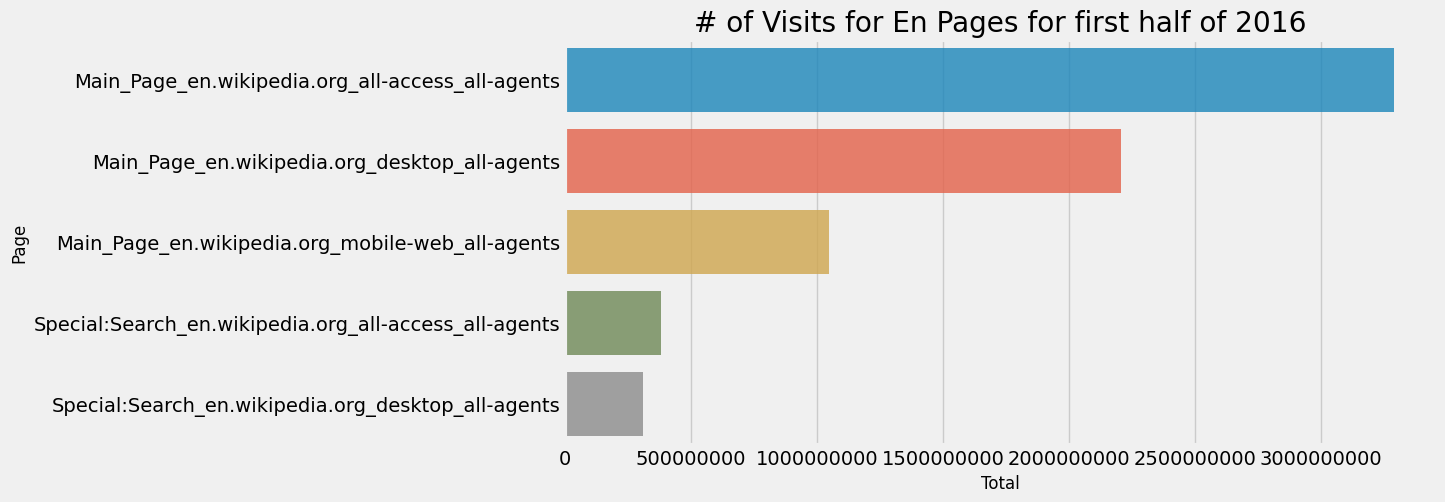

In [ ]:
plt.figure(figsize=(10,5))
ax = sns.barplot(x = x['Total'].values.round(2), y = x['Page'] , alpha=0.8)
plt.title("# of Visits for En Pages for first half of 2016")
plt.ylabel('Page', fontsize=12)
plt.xlabel('Total', fontsize=12)
plt.gca().get_xaxis().get_major_formatter().set_scientific(False)

plt.show()

7. Порівняти розподіли німецьких і французьких сторінок вікіпедії за червень 2016 року.

In [30]:
# Filter by date
train_june_2016 = train.loc[:, (train.columns >= '2016-06-01') & (train.columns <= '2016-06-30')]

In [31]:
# Add back Page and Lang columns
train_june_2016.loc[:,'Page'] = train.loc[:,'Page']
train_june_2016.loc[:,'Language'] = train.loc[:,'Language']
train_june_2016

<ipython-input-31-76d95399d33f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_june_2016.loc[:,'Page'] = train.loc[:,'Page']
<ipython-input-31-76d95399d33f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_june_2016.loc[:,'Language'] = train.loc[:,'Language']


,2016-06-01,2016-06-02,2016-06-03,2016-06-04,2016-06-05,2016-06-06,2016-06-07,2016-06-08,2016-06-09,2016-06-10,...,2016-06-23,2016-06-24,2016-06-25,2016-06-26,2016-06-27,2016-06-28,2016-06-29,2016-06-30,Page,Language
0,21.0,27.0,13.0,11.0,15.0,14.0,18.0,18.0,10.0,11.0,...,8.0,22.0,15.0,69.0,11.0,18.0,23.0,12.0,2NE1_zh.wikipedia.org_all-access_spider,zh
1,10.0,11.0,16.0,10.0,12.0,12.0,13.0,9.0,16.0,19.0,...,13.0,24.0,14.0,13.0,14.0,24.0,16.0,15.0,2PM_zh.wikipedia.org_all-access_spider,zh
2,5.0,7.0,7.0,5.0,3.0,4.0,1.0,9.0,3.0,4.0,...,4.0,3.0,5.0,1.0,6.0,5.0,1.0,4.0,3C_zh.wikipedia.org_all-access_spider,zh
3,8.0,12.0,15.0,10.0,25.0,9.0,8.0,8.0,10.0,14.0,...,22.0,20.0,14.0,12.0,8.0,17.0,11.0,15.0,4minute_zh.wikipedia.org_all-access_spider,zh
4,6.0,2.0,8.0,3.0,7.0,8.0,3.0,4.0,5.0,2.0,...,2.0,2.0,1.0,5.0,2.0,2.0,2.0,3.0,52_Hz_I_Love_You_zh.wikipedia.org_all-access_s...,zh
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145058,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Underworld_(serie_de_películas)_es.wikipedia.o...,es
145059,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Resident_Evil:_Capítulo_Final_es.wikipedia.org...,es
145060,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Enamorándome_de_Ramón_es.wikipedia.org_all-acc...,es
145061,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Hasta_el_último_hombre_es.wikipedia.org_all-ac...,es


In [32]:
# Get dispertion
train_june_2016.loc[:,'std'] = train_june_2016.iloc[:,:-2].std (axis=1,numeric_only=True)
train_june_2016

<ipython-input-32-30e9dd4d5414>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_june_2016.loc[:,'std'] = train_june_2016.iloc[:,:-2].std (axis=1,numeric_only=True)


,2016-06-01,2016-06-02,2016-06-03,2016-06-04,2016-06-05,2016-06-06,2016-06-07,2016-06-08,2016-06-09,2016-06-10,...,2016-06-24,2016-06-25,2016-06-26,2016-06-27,2016-06-28,2016-06-29,2016-06-30,Page,Language,std
0,21.0,27.0,13.0,11.0,15.0,14.0,18.0,18.0,10.0,11.0,...,22.0,15.0,69.0,11.0,18.0,23.0,12.0,2NE1_zh.wikipedia.org_all-access_spider,zh,41.464304
1,10.0,11.0,16.0,10.0,12.0,12.0,13.0,9.0,16.0,19.0,...,24.0,14.0,13.0,14.0,24.0,16.0,15.0,2PM_zh.wikipedia.org_all-access_spider,zh,4.802897
2,5.0,7.0,7.0,5.0,3.0,4.0,1.0,9.0,3.0,4.0,...,3.0,5.0,1.0,6.0,5.0,1.0,4.0,3C_zh.wikipedia.org_all-access_spider,zh,3.077542
3,8.0,12.0,15.0,10.0,25.0,9.0,8.0,8.0,10.0,14.0,...,20.0,14.0,12.0,8.0,17.0,11.0,15.0,4minute_zh.wikipedia.org_all-access_spider,zh,56.075647
4,6.0,2.0,8.0,3.0,7.0,8.0,3.0,4.0,5.0,2.0,...,2.0,1.0,5.0,2.0,2.0,2.0,3.0,52_Hz_I_Love_You_zh.wikipedia.org_all-access_s...,zh,2.370557
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145058,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Underworld_(serie_de_películas)_es.wikipedia.o...,es,NaN
145059,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Resident_Evil:_Capítulo_Final_es.wikipedia.org...,es,NaN
145060,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Enamorándome_de_Ramón_es.wikipedia.org_all-acc...,es,NaN
145061,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Hasta_el_último_hombre_es.wikipedia.org_all-ac...,es,NaN


In [33]:
# Get fr and de langs and display only few columns
defr_train_june_2016 = train_june_2016[(train_april_2016['Language'] == 'fr') | (train_june_2016['Language'] == 'de') ][['Page',	'Language',	'std']]
defr_train_june_2016

,Page,Language,std
4310,10_Cloverfield_Lane_fr.wikipedia.org_desktop_a...,fr,473.682251
4311,1984_(roman)_fr.wikipedia.org_desktop_all-agents,fr,118.897212
4312,24_Heures_du_Mans_fr.wikipedia.org_desktop_all...,fr,1482.043155
4313,24_Heures_du_Mans_2016_fr.wikipedia.org_deskto...,fr,694.794461
4314,2_Broke_Girls_fr.wikipedia.org_desktop_all-agents,fr,216.640921
...,...,...,...
141521,Anschlag_auf_den_Berliner_Weihnachtsmarkt_an_d...,de,NaN
141522,Hacksaw_Ridge_–_Die_Entscheidung_de.wikipedia....,de,NaN
141523,Flugunfall_der_KLM_Fokker_F.XXII_„Kwikstaart“_...,de,NaN
141524,Winnetou_–_Der_Mythos_lebt_de.wikipedia.org_al...,de,NaN


**ВІДПОВІДЬ** ДО ЗАВДАННЯ 7

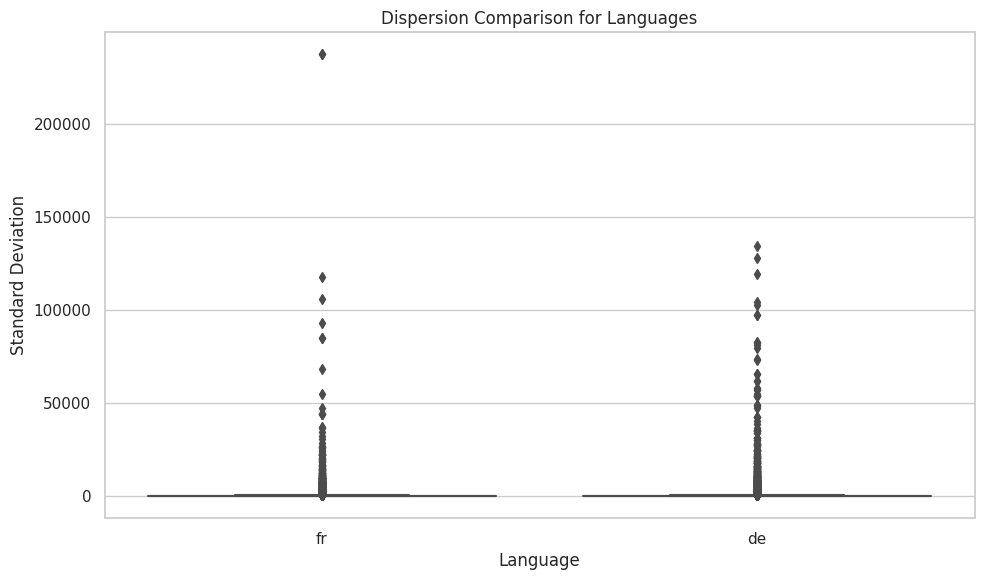

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set up the plot
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

# Create a box plot or violin plot to compare dispersions
sns.boxplot(x='Language', y='std', data=defr_train_june_2016)

# Add labels and title
plt.xlabel('Language')
plt.ylabel('Standard Deviation')
plt.title('Dispersion Comparison for Languages')

# Show the plot
plt.show()

8. Порівняти кількість переглядів для сторінок японської вікіпедії з розбивкою по дням тижня.

**ВІДПОВІДЬ** ДО ЗАВДАННЯ 8

In [97]:
# Filter the data for the desired language
language = 'ja'
filtered_train = train[train['Language'] == language]

# Get only dates columns
only_dates = filtered_train.iloc[:,1:-1]

# Make table only with sums per day
only_dates = only_dates.sum()

# Convert the remaining column names to datetime objects
only_dates.index = pd.to_datetime(only_dates.index, format='%Y-%m-%d')

# Extract the day of the week from the column names
only_dates.index = only_dates.index.day_name()

# Group columns by name so we got day of the week as column names. And take the Average between same day of week
only_dates = only_dates.groupby(level=0, ).mean()

only_dates

Friday       1.546787e+07
Monday       1.576458e+07
Saturday     1.607655e+07
Sunday       1.716913e+07
Thursday     1.483169e+07
Tuesday      1.500170e+07
Wednesday    1.479260e+07
dtype: float64

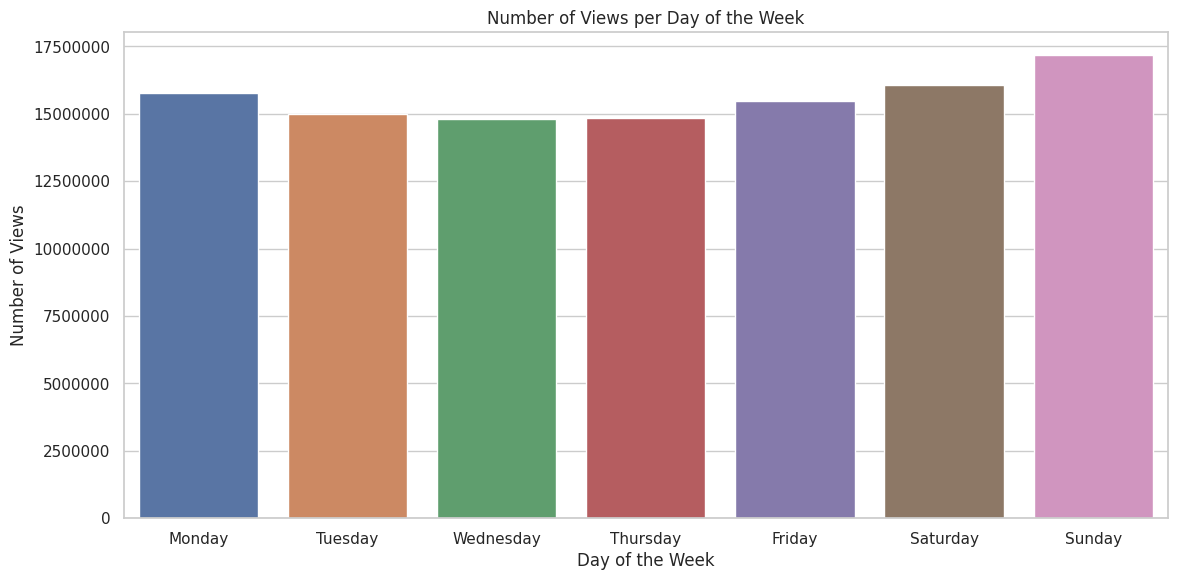

In [107]:
# Set up the plot
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))

# Define the order of the days of the week
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Create the bar plot
sns.barplot(x=only_dates.index, y=only_dates, order=day_order)

# Set the plot title and axis labels
plt.title('Number of Views per Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Views')

# Disable scientific notation for y-axis tick labels
plt.gca().get_yaxis().get_major_formatter().set_scientific(False)

# Display the plot
plt.show()
